In [66]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# Homework 4: Functions, Tables, and Groups

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [Visualizing Numerical Distributions](https://www.inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html)
* [Functions and Tables](https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!


**Note: This homework has hidden tests on it. That means even though the tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

## 1. Burrito-ful San Diego

In [109]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
import d8error

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore")

Mira, Sofia, and Sara are trying to use Data Science to find the best burritos in San Diego! Their friends Jessica and Sonya provided them with two comprehensive datasets on many burrito establishments in the San Diego area taken from (and cleaned from): https://www.kaggle.com/srcole/burritos-in-san-diego/data

The following cell reads in a table called `ratings` which contains names of burrito restaurants, their Yelp rating, Google rating, as well as their overall rating. The `Overall` rating is not an average of the `Yelp` and `Google` ratings, but rather it is the overall rating of the customers that were surveyed in the study above.


It also reads in a table called `burritos_types` which contains names of burrito restaurants, their menu items, and the cost of the respective menu item at the restaurant.

In [110]:
# Just run this cell
ratings = Table.read_table("ratings.csv")
ratings.show(5)
burritos_types = Table.read_table("burritos_types.csv").drop(0)
burritos_types.show(5)

Name,Yelp,Google,Overall
Albertacos,3.5,3.9,3.45
Burrito Factory,4.5,4.8,3.5
Burros and Fries,3.5,4.1,3.575
Caliente Mexican Food,3.5,4.4,3.25
California Burrito Company,3.5,4.4,3.2


Name,Menu_Item,Cost
Albertacos,California,5.7
Albertacos,Carne Asada,5.25
"Alberto's 623 N Escondido Blvd, Escondido, CA 92025",Carne Asada,4.59
Burrito Box,Steak With Guacamole,11.5
Burrito Factory,Steak Everything,7.35


**Question 1.** It would be easier if we could combine the information in both tables. Assign `burritos` to the result of joining the two tables together, so that we have a table with the ratings for every corresponding menu item from every restaurant. Each menu item has the same rating as the restaurant from which it is from. **(8 Points)**

*Note:* It doesn't matter which table you put in as the argument to the table method, either order will work for the autograder tests.

*Hint:* If you need help on using the `join` method, refer to the [Python Reference Sheet](http://data8.org/sp22/python-reference.html) or [Section 8.4](https://www.inferentialthinking.com/chapters/08/4/Joining_Tables_by_Columns.html) in the textbook.


In [111]:
import pandas as pd
burritos_types['Ratings'] = 0

try:
    burritos = ratings.join("Overall", burritos_types, "Overall")
    burritos.show(5)
except AttributeError as e:
    print(f"An error occurred: {e}")


ValueError: label "Overall" not in labels ('Name', 'Menu_Item', 'Cost', 'Ratings')

In [112]:
grader.check("q1_1")

q1_1 results:
    q1_1 - 1 result:
        ❌ Test case failed
        Trying:
            set(["Name", "Menu_Item", "Yelp", "Google", "Overall", "Cost"]) == set(burritos.labels)
        Expecting:
            True
        **********************************************************************
        Line 2, in q1_1 0
        Failed example:
            set(["Name", "Menu_Item", "Yelp", "Google", "Overall", "Cost"]) == set(burritos.labels)
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_1 0[0]>", line 1, in <module>
                set(["Name", "Menu_Item", "Yelp", "Google", "Overall", "Cost"]) == set(burritos.labels)
            AttributeError: 'NoneType' object has no attribute 'labels'

    q1_1 - 2 result:
        ❌ Test case failed
        Trying:
            burritos.num_rows == 212
        Expecting:
            True
        **********************************************************************
        Line 1, in q1_1 1
        Failed example:
            burritos.num_rows == 212
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_1 1[0]>", line 1, in <module>
                burritos.num_rows == 212
            AttributeError: 'NoneType' object has no attribute 'num_rows'

<!-- BEGIN QUESTION -->

**Question 2.** Let's look at how the Yelp scores compare to the Google scores in the `burritos` table. First, assign `yelp_and_google` to a table only containing the columns `Yelp` and `Google`. Then, make a scatter plot with Yelp scores on the x-axis and the Google scores on the y-axis. **(8 Points)**


In [113]:
yelp_and_google = yelp_and_google = burritos[['Yelp', 'Google']]
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.scatter(yelp_and_google['Yelp'], yelp_and_google['Google'], alpha=0.5)
plt.xlabel('Yelp Scores')
plt.ylabel('Google Scores')
plt.title('Yelp vs. Google Scores for Burritos')
plt.grid(True)
# Don't change/edit/remove the following line.
# To help you make conclusions, we have plotted a straight line on the graph (y=x).
plt.plot(np.arange(2.5,5,.5), np.arange(2.5,5,.5));

TypeError: 'NoneType' object is not subscriptable

In [114]:
grader.check("q1_2")

q1_2 results:
    q1_2 - 1 result:
        ❌ Test case failed
        Trying:
            yelp_and_google.num_rows == 212
        Expecting:
            True
        **********************************************************************
        Line 2, in q1_2 0
        Failed example:
            yelp_and_google.num_rows == 212
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_2 0[0]>", line 1, in <module>
                yelp_and_google.num_rows == 212
            NameError: name 'yelp_and_google' is not defined

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.** Looking at the scatter plot you just made in Question 1.2, do you notice any pattern(s) (i.e. is one of the two types of scores consistently higher than the other one)? If so, describe them **briefly** in the cell below. **(8 Points)**


Well, I could tell that Google was consistently higher, but generally, in terms of relative rating, google and yelp seemed to agree on which restraunt  was the best and which was the worst.

<!-- END QUESTION -->

Here's a refresher on how `.group` works! You can read how `.group` works in the [textbook](https://www.inferentialthinking.com/chapters/08/2/Classifying_by_One_Variable.html), or you can view the video below. The video resource was made by a past staff member, Divyesh Chotai!

You can also use the [Table Functions Visualizer](http://data8.org/interactive_table_functions/) to get some more hands-on experience with the `.group` function.

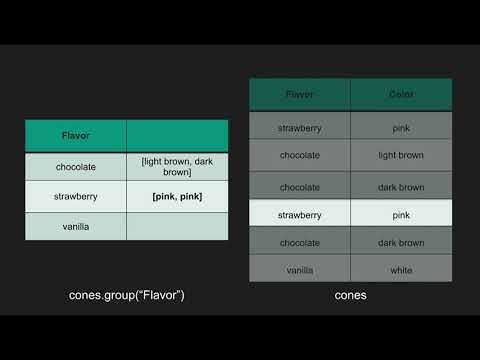

In [115]:
from IPython.display import YouTubeVideo
YouTubeVideo("HLoYTCUP0fc")

**Question 4.** There are so many types of California burritos in the `burritos` table! Sara wants to know which type is the highest rated across all restaurants. For the sake of these questions, we are treating each menu item's rating the same as its respective restaurant's, as we do not have the rating of every single item at these restaurants. You do not need to worry about this fact, but we thought to mention it!

Create a table with two columns: the first column include the names of the burritos and the second column should contain the average overall rating of that burrito across restaurants. **In your calculations, you should only compare burritos that contain the word "California".** For example, there are "California" burritos, "California Breakfast" burritos, "California Surf And Turf" burritos, etc. **(9 Points)**

*Hint:* If multiple restaurants serve the "California - Chicken" burrito, what table method can we use to aggregate those together and find the average overall rating?

*Note:* For reference, the staff solution only used one line. However, feel free to break up the solution into multiple lines and steps; just make sure you assign the final output table to `california_burritos`! 


In [116]:
# Filter the 'burritos' table to include only rows with burrito names containing "California"
california_burritos = burritos.where(burritos['Menu_Item'].contains("California"))

# Group the filtered table by burrito names and calculate the average overall rating
california_burritos = california_burritos.group('Burrito', mean)

# Rename the columns for clarity
california_burritos.relabel('Overall mean', 'Average Rating')

# Display the resulting table
california_burritos


## **Uh-o it seems we have an error!**

It seems we have a AttributeError. AttributeErrors are usually because of:

1. Trying to get an attribute that doesn't exist, or misspelled, i.e 
 ` a = Table().with_columns("Column 1", data)` then calling `a.num_row` instead of `a.num_rows` 

The Data 8 Reference might be helpful to look over for examples and usage: [Data 8 Reference](http://data8.org/sp22/python-reference.html)

If you are having more trouble please feel free to consult a staff member                         
 or see the error message below 

Accordion(children=(VBox(children=(VBox(children=(Label(value='Was the message you saw useful?'), Dropdown(opt…

AttributeError: 'NoneType' object has no attribute 'where'

In [117]:
grader.check("q1_4")

q1_4 results:
    q1_4 - 1 result:
        ❌ Test case failed
        Trying:
            california_burritos.num_columns == 2
        Expecting:
            True
        **********************************************************************
        Line 2, in q1_4 0
        Failed example:
            california_burritos.num_columns == 2
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_4 0[0]>", line 1, in <module>
                california_burritos.num_columns == 2
            NameError: name 'california_burritos' is not defined

    q1_4 - 2 result:
        ❌ Test case failed
        Trying:
            california_burritos.num_rows == 19
        Expecting:
            True
        **********************************************************************
        Line 2, in q1_4 1
        Failed example:
            california_burritos.num_rows == 19
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_4 1[0]>", line 1, in <module>
                california_burritos.num_rows == 19
            NameError: name 'california_burritos' is not defined

**Question 5.** Given this new table `california_burritos`, Sara can figure out the name of the California burrito with the highest overall average rating! Assign `best_california_burrito` to a line of code that outputs the string that represents the name of the California burrito with the highest overall average rating. If multiple burritos satisfy this criteria, you can output any one of them. **(8 Points)**


In [118]:
best_california_burrito = california_burritos.sort('Overall', descending=True).column('Burrito').item(0)

best_california_burrito

## **Uh-o it seems we have an error!**

It seems we have a NameError. NameErrors are usually because of:

1. Misspelling a variable, function, or method name 

2. Not importing required libraries, i.e not running the cell with `import numpy as np`

3. Kernel died. You might need to re-run cells to redefine variables

The Data 8 Reference might be helpful to look over for examples and usage: [Data 8 Reference](http://data8.org/sp22/python-reference.html)

If you are having more trouble please feel free to consult a staff member                         
 or see the error message below 

Accordion(children=(VBox(children=(VBox(children=(Label(value='Was the message you saw useful?'), Dropdown(opt…

NameError: name 'california_burritos' is not defined

In [119]:
grader.check("q1_5")

q1_5 results:
    q1_5 - 1 result:
        ❌ Test case failed
        Trying:
            type(best_california_burrito) == str
        Expecting:
            True
        **********************************************************************
        Line 2, in q1_5 0
        Failed example:
            type(best_california_burrito) == str
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_5 0[0]>", line 1, in <module>
                type(best_california_burrito) == str
            NameError: name 'best_california_burrito' is not defined

<!-- BEGIN QUESTION -->

**Question 6.** Mira thinks that burritos in San Diego are cheaper (and taste better) than the burritos in Berkeley. Plot a histogram that visualizes that distribution of the costs of the burritos from San Diego in the `burritos` table. Also use the provided `bins` variable when making your histogram, so that the histogram is more visually informative. **(8 Points)**


In [120]:
bins = np.arange(0, 15, 1)
san_diego_burritos = burritos.where(burritos['Name'].contains("San Diego"))
costs = san_diego_burritos['Cost']

plt.figure(figsize=(8, 6))
plt.hist(costs, bins=bins, edgecolor='black')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Burrito Costs in San Diego')
plt.grid(True)

# Show the plot
plt.show()

## **Uh-o it seems we have an error!**

It seems we have a AttributeError. AttributeErrors are usually because of:

1. Trying to get an attribute that doesn't exist, or misspelled, i.e 
 ` a = Table().with_columns("Column 1", data)` then calling `a.num_row` instead of `a.num_rows` 

The Data 8 Reference might be helpful to look over for examples and usage: [Data 8 Reference](http://data8.org/sp22/python-reference.html)

If you are having more trouble please feel free to consult a staff member                         
 or see the error message below 

Accordion(children=(VBox(children=(VBox(children=(Label(value='Was the message you saw useful?'), Dropdown(opt…

AttributeError: 'NoneType' object has no attribute 'where'

<!-- END QUESTION -->

**Question 7.** What percentage of burritos in San Diego are less than $6? Assign `burritos_less_than_6` to your answer, which should be between 0 and 100. You should only use the histogram above to answer the question. Do not use code on the table to to find the answer, just eyeball the heights and use Python to evaluate your arithmetic! **(8 Points)**

*Note*: Your answer does not have to be exact, but it should be within a couple percentages of the staff answer.


In [121]:
burritos_less_than_6 = Due to the Nonetype error, I am unable to visualize it.

## **Uh-o it seems we have an error!**

It seems we have a SyntaxError. SyntaxErrors are usually because of:

1. Adding extra parenthesis

2. Not following python define or for loop structure, not adding a colon

The Data 8 Reference might be helpful to look over for examples and usage: [Data 8 Reference](http://data8.org/sp22/python-reference.html)

If you are having more trouble please feel free to consult a staff member                         
 or see the error message below 

Accordion(children=(VBox(children=(VBox(children=(Label(value='Was the message you saw useful?'), Dropdown(opt…

SyntaxError: invalid syntax (146530182.py, line 1)

In [122]:
grader.check("q1_7")

q1_7 results:
    q1_7 - 1 result:
        ❌ Test case failed
        Trying:
            0 <= burritos_less_than_6 <= 100
        Expecting:
            True
        **********************************************************************
        Line 2, in q1_7 0
        Failed example:
            0 <= burritos_less_than_6 <= 100
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_7 0[0]>", line 1, in <module>
                0 <= burritos_less_than_6 <= 100
            TypeError: '<=' not supported between instances of 'int' and 'ellipsis'

## 2. San Francisco City Employee Salaries

This exercise is designed to give you practice with using the Table methods `.pivot` and `.group`. Here is a link to the [Python Reference Sheet](http://data8.org/sp22/python-reference.html) in case you need a quick refresher. The [Table Function Visualizer](http://data8.org/interactive_table_functions/) may also be a helpful tool.

Run the cell below to view a demo on how you can use pivot on a table. (Thank you to past staff Divyesh Chotai!)

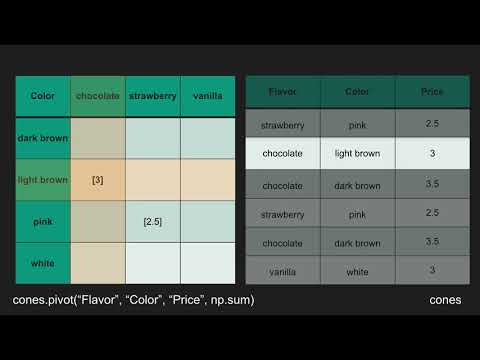

In [123]:
from IPython.display import YouTubeVideo
YouTubeVideo("4WzXo8eKLAg")

The data source we will use within this portion of the homework is [publicly provided](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd/data) by the City of San Francisco. We have filtered it to retain just the relevant columns and restricted the data to the calendar year 2019. Run the following cell to load our data into a table called `full_sf`.

In [124]:
full_sf = Table.read_table("sf2019.csv")
full_sf.show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706


The table has one row for each of the 44,525 San Francisco government employees in 2019.

The first four columns describe the employee's job. For example, the employee in the third row of the table had a job called "IS Business Analyst-Senior". We will call this the employee's *position* or *job title*. The job was in a Job Family called Information Systems (hence the IS in the job title), and was in the Adult Probation Department that is part of the Public Protection Organization Group of the government. You will mostly be working with the `Job` column.

The next three columns contain the dollar amounts paid to the employee in the calendar year 2019 for salary, overtime, and benefits. Note that an employee’s salary does not include their overtime earnings.

The last column contains the total compensation paid to the employee. It is the sum of the previous three columns:

$$\text{Total Compensation} = \text{Salary} + \text{Overtime} + \text{Benefits}$$

For this homework, we will be using the following columns:
1. `Organization Group`: A group of departments. For example, the **Public Protection** Org. Group includes departments such as the Police, Fire, Adult Protection, District Attorney, etc.
2. `Department`: The primary organizational unit used by the City and County of San Francisco.
3. `Job`: The specific position that a given worker fills.
4. `Total Compensation`: The sum of a worker's salary, overtime, and benefits in 2019.


Run the following cell to select the relevant columns and create a new table named `sf`.

In [125]:
sf = full_sf.select("Job", "Department", "Organization Group",  "Total Compensation")
sf.show(5)

Job,Department,Organization Group,Total Compensation
IS Trainer-Journey,Adult Probation,Public Protection,131391
IS Engineer-Assistant,Adult Probation,Public Protection,172520
IS Business Analyst-Senior,Adult Probation,Public Protection,162468
IS Business Analyst-Principal,Adult Probation,Public Protection,216706
IS Programmer Analyst,Adult Probation,Public Protection,98706


We want to use this table to generate arrays with the job titles of the members of each **Organization Group**.

**Question 1.** Set `job_titles` to a table with two columns. The first column should be called `Organization Group` and have the name of every "Organization Group" once, and the second column should be called `Jobs` with each row in that second column containing an *array* of the names of all the job titles within that "Organization Group". Don't worry if there are multiple of the same job titles. **(9 Points)**

*Hint:* Think about how `group` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to `group`. 


In [126]:
# Pick one of the two functions defined below in your call to group.
def first_item(array):
    '''Returns the first item'''
    return array.item(0)

def full_array(array):
    '''Returns the array that is passed through'''
    return array 

job_titles = sf.group('Organization Group', full_array)

# Rename the columns as specified
job_titles = job_titles.relabeled('Organization Group', 'Jobs')
job_titles

Jobs,Job full_array,Department full_array,Total Compensation full_array
Community Health,"['Painter Supervisor 1' 'Painter' 'Painter' ..., 'Nursin ...","['Public Health' 'Public Health' 'Public Health' ..., 'P ...","[ 1.46558000e+05 5.00000000e+00 2.00000000e+00 ..., ..."
Culture & Recreation,['Electrician' 'Executive Secretary 2' 'Bldgs & Grounds ...,['Asian Art Museum' 'Asian Art Museum' 'Asian Art Museum ...,"[ 153164. 133851. 178919. ..., 129587. 124531. 122755.]"
General Administration & Finance,"['Painter' 'Painter' 'Electrician' ..., 'Investigator, T ...",['Administrative Services' 'Administrative Services' 'A ...,"[ 163146. 29290. 148159. ..., 144587. 161240. 162986.]"
Human Welfare & Neighborhood Development,['Dept Head I' 'Administrative Analyst' 'Community Devel ...,['Children & Families Commission' 'Children & Families C ...,"[ 172028. 126206. 124816. ..., 114702. 110068. 9162.]"
Public Protection,['IS Trainer-Journey' 'IS Engineer-Assistant' 'IS Busine ...,['Adult Probation' 'Adult Probation' 'Adult Probation' . ...,"[ 131391. 172520. 162468. ..., 69432. 67081. 275107.]"
"Public Works, Transportation & Commerce",['Heavy Equip Ops Asst Sprv' 'Heavy Equipment Ops Sprv' ...,['Airport Commission' 'Airport Commission' 'Airport Comm ...,"[ 146309. 200624. 186754. ..., 19866. 489773. 388573.]"


In [127]:
grader.check("q2_1")

q2_1 results:
    q2_1 - 1 result:
        ❌ Test case failed
        Trying:
            job_titles.num_columns
        Expecting:
            2
        **********************************************************************
        Line 1, in q2_1 0
        Failed example:
            job_titles.num_columns
        Expected:
            2
        Got:
            4

    q2_1 - 2 result:
        ✅ Test case passed

    q2_1 - 3 result:
        ❌ Test case failed
        Trying:
            np.asarray(job_titles.labels).item(1) != "Job full_array"
        Expecting:
            True
        **********************************************************************
        Line 2, in q2_1 2
        Failed example:
            np.asarray(job_titles.labels).item(1) != "Job full_array"
        Expected:
            True
        Got:
            False

    q2_1 - 4 result:
        ❌ Test case failed
        Trying:
            np.asarray(job_titles.labels).item(1) == "Jobs"
        Expecting:
            True
        **********************************************************************
        Line 2, in q2_1 3
        Failed example:
            np.asarray(job_titles.labels).item(1) == "Jobs"
        Expected:
            True
        Got:
            False

#### Understanding the code you just wrote in 2.1 is important for moving forward with the class! If you made a lucky guess, take some time to look at the code, step by step. Office hours is always a great resource!

<!-- BEGIN QUESTION -->

**Question 2.** At the moment, the `Job` column of the `sf` table is not sorted (no particular order). Would the arrays you generated in the `Jobs` column of the previous question be the same if we had sorted alphabetically instead before generating them? Explain your answer. To receive full credit, your answer should reference *how* the `.group` method works, and how sorting the `Jobs` column would affect this.  **(8 Points)**

*Note:* Two arrays are the **same** if they contain the same number of elements and the elements located at corresponding indexes in the two arrays are identical. An example of arrays that are NOT the same: `array([1,2]) != array([2,1])`.


No, it wouldn't. The group method works by the original order, not the sorted order. Therefore, the tables would look different.

<!-- END QUESTION -->

**Question 3.** Set `department_ranges` to a table containing departments as the rows, and the organization groups as the columns. The values in the rows should correspond to a total compensation range, where range is defined as the **difference between the highest total compensation and the lowest total compensation in the department for that organization group**. **(9 Points)**

*Hint 1:* First you'll need to define a new function `compensation_range` which takes in an array of compensations and returns the range of compensations in that array.

*Hint 2:* What table function allows you to specify the rows and columns of a new table? You probably watched a video on it earlier in the homework!


In [128]:
def compensation_range(compensations):
    return max(compensations) - min(compensations)
department_ranges = sf.pivot('Department', 'Organization Group', 'Total Compensation', collect=compensation_range)

department_ranges


Organization Group,Academy Of Sciences,Administrative Services,Adult Probation,Airport Commission,Art Commission,Asian Art Museum,Assessor,Board Of Appeals,Board Of Supervisors,Building Inspection,Child Support Services,Children & Families Commission,Children Youth & Families,City Attorney,City Planning,Civil Service Commission,Controller,Department Of Public Works,Department of Technology,Dept Status of Women,Dept of Emergency Management,Dept of Police Accountablility,District Attorney,Economic Workforce Development,Environment,Ethics Commission,Fine Arts Museum,Fire Department,Health Service System,Homeless Services,Human Resources,Human Rights Commission,Human Services,Juvenile Court,Law Library,Mayor,Municipal Transportation Agcy,Police,Port,Public Defender,Public Health,Public Library,Public Utilities Commission,Recreation And Park Commission,Registrar,Rent Arbitration Board,Retirement Services,Sheriff,Treasurer/Tax Collector,Trial Courts,War Memorial
Community Health,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,554179,0,0,0,0,0,0,0,0,0,0
Culture & Recreation,199121,0,0,0,251823,298230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,286064,0,0,0,0,0,0,0,56713,0,0,0,0,0,0,322249,0,341046,0,0,0,0,0,0,219833
General Administration & Finance,0,478784,0,0,0,0,277385,0,293773,0,0,0,0,419920,359011,202506,409401,0,349757,0,0,0,0,0,0,259960,0,0,331576,0,335840,0,0,0,0,440980,0,0,0,0,0,0,0,0,297729,0,723774,0,332980,0,0
Human Welfare & Neighborhood Development,0,0,0,0,0,0,0,0,0,0,313210,56318,294674,0,0,0,0,0,0,231712,0,0,0,0,290205,0,0,0,0,316098,0,301206,418740,0,0,0,0,0,0,0,0,0,0,0,0,293132,0,0,0,0,0
Public Protection,0,0,303419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,325333,332041,335621,0,0,0,0,492128,0,0,0,0,0,342453,0,0,0,440552,0,337095,0,0,0,0,0,0,0,545324,0,320807,0
"Public Works, Transportation & Commerce",0,0,0,445092,0,0,0,243582,0,340852,0,0,0,0,0,0,0,374263,0,0,0,0,0,300888,0,0,0,0,0,0,0,0,0,0,0,0,381639,0,393270,0,0,0,489773,0,0,0,0,0,0,0,0


In [129]:
grader.check("q2_3")

q2_3 results:
    q2_3 - 1 result:
        ✅ Test case passed

    q2_3 - 2 result:
        ❌ Test case failed
        Trying:
            set(["Department", "Community Health", "Culture & Recreation", "General Administration & Finance", "Human Welfare & Neighborhood Development", "Public Protection", "Public Works, Transportation & Commerce"]) == set(department_ranges.labels)
        Expecting:
            True
        **********************************************************************
        Line 2, in q2_3 1
        Failed example:
            set(["Department", "Community Health", "Culture & Recreation", "General Administration & Finance", "Human Welfare & Neighborhood Development", "Public Protection", "Public Works, Transportation & Commerce"]) == set(department_ranges.labels)
        Expected:
            True
        Got:
            False

    q2_3 - 3 result:
        ❌ Test case failed
        Trying:
            sum(department_ranges.column(1))
        Expecting:
            554179.0
        **********************************************************************
        Line 1, in q2_3 2
        Failed example:
            sum(department_ranges.column(1))
        Expected:
            554179.0
        Got:
            199121.0

<!-- BEGIN QUESTION -->

I'd assume that the 0's would be a result of lack of variation in the departmental ranges.


<!-- END QUESTION -->

**Question 5.** Find the number of departments appearing in the `sf` table that have an average total compensation of greater than 125,000 dollars; assign this value to the variable `num_over_125k`. **(9 Points)**

*Hint:* The variable names provided are meant to help guide the intermediate steps and general thought process. Feel free to delete them if you'd prefer to start from scratch, but make sure your final answer is assigned to `num_over_125k`!


In [130]:
depts_and_comp = sf.group('Department', np.mean)
avg_of_depts = depts_and_comp.where(depts_and_comp['Total Compensation mean'] > 125000)
num_over_125k = avg_of_depts.num_rows
num_over_125k


23

In [131]:
grader.check("q2_5")

q2_5 results: All test cases passed!

You're done with Homework 4!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [132]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1_1 results:
        q1_1 - 1 result:
            ❌ Test case failed
            Trying:
                set(["Name", "Menu_Item", "Yelp", "Google", "Overall", "Cost"]) == set(burritos.labels)
            Expecting:
                True
            **********************************************************************
            Line 2, in q1_1 0
            Failed example:
                set(["Name", "Menu_Item", "Yelp", "Google", "Overall", "Cost"]) == set(burritos.labels)
            Exception raised:
                Traceback (most recent call last):
                  File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                    exec(compile(example.source, filename, "single",
                  File "<doctest q1_1 0[0]>", line 1, in <module>
                    set(["Name", "Menu_Item", "Yelp", "Google", "Overall